# Tarea 2

### Luis Felipe Cubero Vargas

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("CompraBicicletas.csv",sep = ";")

In [3]:
df.columns

Index(['ID', 'MaritalStatus', 'Gender', 'Income', 'Children', 'Education',
       'Occupation', 'HomeOwner', 'Cars', 'CommuteDistance', 'Region', 'Age',
       'PurchasedBike'],
      dtype='object')

In [4]:
df.head()

,ID,MaritalStatus,Gender,Income,Children,Education,Occupation,HomeOwner,Cars,CommuteDistance,Region,Age,PurchasedBike
0,12496,Married,Female,40000,1,Bachelors,SkilledManual,Yes,0,0-1Miles,Europe,42,No
1,24107,Married,Male,30000,3,PartialCollege,Clerical,Yes,1,0-1Miles,Europe,43,No
2,14177,Married,Male,80000,5,PartialCollege,Professional,No,2,2-5Miles,Europe,60,No
3,24381,Single,Male,70000,0,Bachelors,Professional,Yes,1,5-10Miles,Pacific,41,Yes
4,25597,Single,Male,30000,0,Bachelors,Clerical,No,0,0-1Miles,Europe,36,Yes


Revisión de datos perdidos dentro del dataset

In [5]:
df.isna().sum()

ID                 0
MaritalStatus      0
Gender             0
Income             0
Children           0
Education          0
Occupation         0
HomeOwner          0
Cars               0
CommuteDistance    0
Region             0
Age                0
PurchasedBike      0
dtype: int64

A partir de lo anterior no existen datos perdidos, podemos proseguir con el análisis

In [6]:
df["Income"].describe()

count      1000.000000
mean      56140.000000
std       31081.609779
min       10000.000000
25%       30000.000000
50%       60000.000000
75%       70000.000000
max      170000.000000
Name: Income, dtype: float64

1) De lo anterior obtenemos que 

* Rango: 10,000 a 17,000
* Media: 56,140
* Desviación estandar: 31081

2) También sabemos que el 25% de las personas ganan menos de 30,000







In [7]:
print(f'La mediana del Income es de {df["Income"].median()}')
df["Income"].hist()

La mediana del Income es de 60000.0


Dado que la mediana es de 60,000 y la media de de 56,140 no presenta una distribución simétrica, presenta una asimetría hacia la derecha  

Ahora es necesario obtener los elementos descripitivos para la variables Children, Cars y Age, con lo cual usaremos la función describe de pandas



In [8]:
df[[ 'Children', 'Cars' ,'Age']].describe()

,Children,Cars,Age
count,1000.000000,1000.000000,1000.000000
mean,1.908000,1.452000,44.190000
std,1.626094,1.124705,11.353537
min,0.000000,0.000000,25.000000
25%,0.000000,1.000000,35.000000
50%,2.000000,1.000000,43.000000
75%,3.000000,2.000000,52.000000
max,5.000000,4.000000,89.000000


De lo anterior podemos ver que el 75% de las personas tiene menos de 3, hijos. Con una media de 1.9 hijos, y 1.4 carros por persona y la edad promedio de 44 años.

Text(0.5, 1.0, 'Cars')

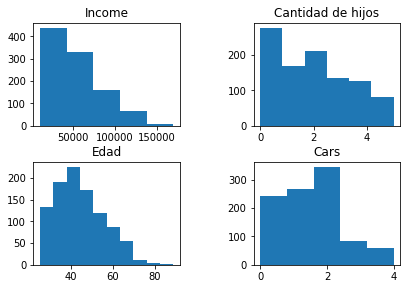

In [22]:


import numpy as np
import matplotlib.pyplot as plt
 
plt.subplots(nrows=4, ncols=4)    
plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.35,wspace=0.50)
plt.subplot(221)
p1 = plt.hist(df.Income, bins=5)
plt.title('Income')
plt.subplot(222)
p2 = plt.hist(df.Children, bins=6)
plt.title('Cantidad de hijos')
plt.subplot(223)
p3 = plt.hist(df.Age, bins=10)
plt.title('Edad')
plt.subplot(224)
p2 = plt.hist(df.Cars, bins=5)
plt.title('Cars')

7) De las gráficas anteriores podemos ver que que todas se encuentran sesgadas hacía la derecha

7) A partir de los graficos anteriores, ninguno sigue una distribución normal

8) De estás solo la cantidad de hijos parece seguir una distribución simetrica, las otras tres variables presentan simetria  


Text(0.5, 1.0, 'Cars')

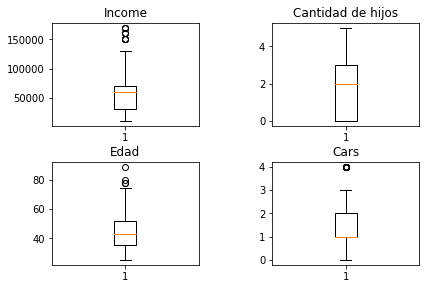

In [10]:
plt.subplots(nrows=4, ncols=4)    
plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.35,wspace=0.50)

plt.subplot(221)
p1 = plt.boxplot(df.Income)
plt.title('Income')
plt.subplot(222)
p2 = plt.boxplot(df.Children)
plt.title('Cantidad de hijos')
plt.subplot(223)
p3 = plt.boxplot(df.Age)
plt.title('Edad')
plt.subplot(224)
p2 = plt.boxplot(df.Cars)
plt.title('Cars')

La variable que presenta mayor dispersión es la cantidad de hijos dado que su caja es la que tiene la media con mayor desplazamiento con respecto a los cuartiles.

In [25]:
df.Income.var()
print(f"La varianza del Income es de :{df.Income.var()}")
df.Children.var()
print(f"La varianza de la cantidad de hijos es de :{df.Children.var()}")
df.Age.var()
print(f"La varianza de los años es de :{df.Age.var()}")
df.Cars.var()
print(f"La varianza de la cantidad de carros es de :{df.Cars.var()}")



La varianza del Income es de :966066466.4664664
La varianza de la cantidad de hijos es de :2.64418018018018
La varianza de los años es de :128.9028028028028
La varianza de la cantidad de carros es de :1.2649609609609611


Ahora para generar la matriz de covarianza

In [28]:
df[['Income','Children', 'Cars' ,'Age']].cov()

,Income,Children,Cars,Age
Income,9.660665e+08,13067.947948,15650.370370,59683.083083
Children,1.306795e+04,2.644180,0.501085,9.796276
Cars,1.565037e+04,0.501085,1.264961,2.433554
Age,5.968308e+04,9.796276,2.433554,128.902803


Por último realizar una correlación de Pearson para las variables de la cantidad de hijos y la edad

In [30]:
df.corr(method="pearson")['Age']['Children']

0.5306208629857723

La correlación anterior nos indica que conforme aumenta la edad de hijos incrementa, no obstante, no es una correlación muy alta pero tampoco tan baja lo cual nos puede dar una idea que de que no siempre la edad implica mayor cantidad de hijos, ya que puede tener más hijos a poca edad o menos hijos aunque mayor edad